In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing  #for label encoding
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.linear_model import LogisticRegression  #for Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics  #for confusion matrix
from sklearn.metrics import classification_report  #for accuracy of the trained model

df = pd.read_csv("EmployeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.shape

(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df['StandardHours'].nunique()

1

In [6]:
df['EmployeeNumber'].nunique()

1470

In [2]:
df.drop('EmployeeCount',axis=1,inplace = True)

In [3]:
df.drop('EmployeeNumber',axis = 1, inplace= True)

In [4]:
df.drop('StandardHours',axis=1,inplace = True)
#there's no deviation from the mean

In [5]:
df.drop('Over18', axis=1, inplace = True)
#as we already have Age parameter

In [6]:
dataset = []
for i in df:
    if df[i].dtype == 'O':
        dataset.append(i)
print(dataset)


['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
dataset

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

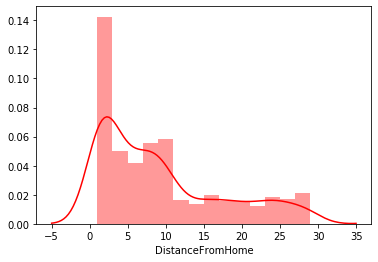

In [14]:
sns.distplot(df['DistanceFromHome'],color = 'r')

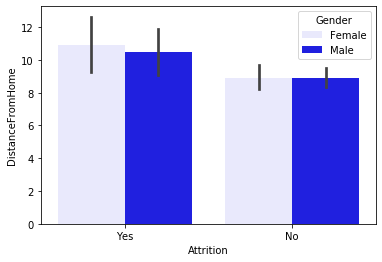

In [15]:
sns.barplot(df['Attrition'],df['DistanceFromHome'],hue=df['Gender'],color='blue')

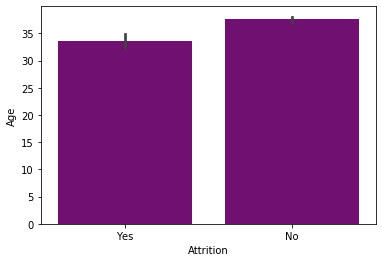

In [16]:
sns.barplot(df['Attrition'],df['Age'],color='purple')

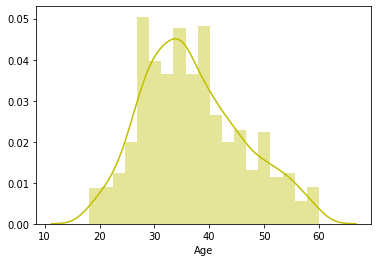

In [17]:
sns.distplot(df['Age'],color='y')

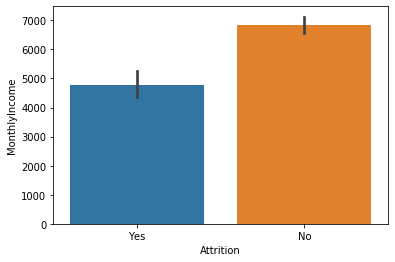

In [18]:
sns.barplot(df['Attrition'],df['MonthlyIncome'])

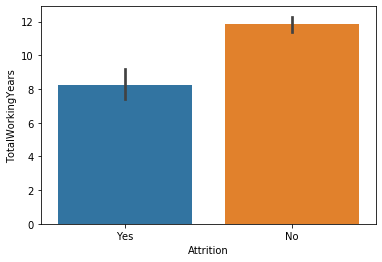

In [19]:
sns.barplot(df['Attrition'],df['TotalWorkingYears'])

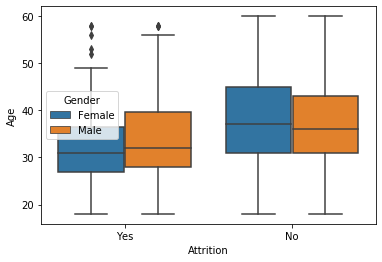

In [20]:
sns.boxplot(df['Attrition'],df['Age'],hue=df['Gender'])

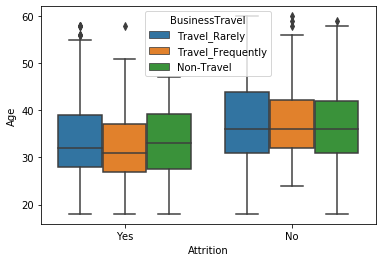

In [21]:
sns.boxplot(df['Attrition'],df['Age'],hue=df['BusinessTravel'])

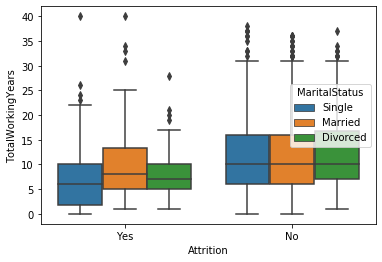

In [22]:
sns.boxplot(df['Attrition'],df['TotalWorkingYears'],hue=df['MaritalStatus'])

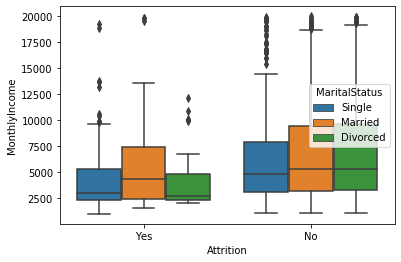

In [23]:
sns.boxplot(df['Attrition'],df['MonthlyIncome'],hue=df['MaritalStatus'])

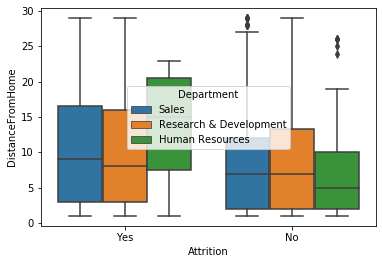

In [24]:
sns.boxplot(df['Attrition'],df['DistanceFromHome'],hue=df['Department'])

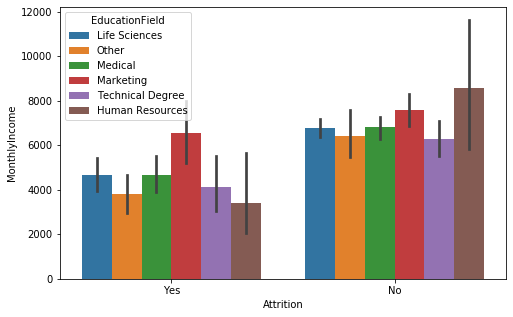

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(df['Attrition'],df['MonthlyIncome'],hue=df['EducationField'])

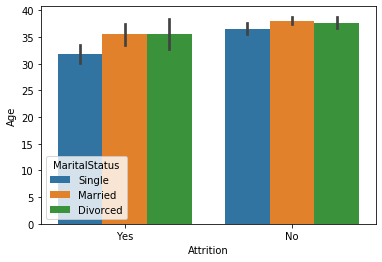

In [26]:
sns.barplot(df['Attrition'],df['Age'],hue=df['MaritalStatus'])

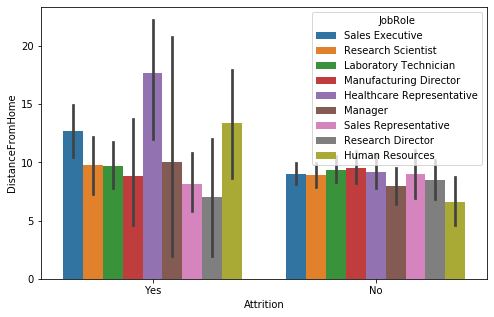

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(df['Attrition'],df['DistanceFromHome'],hue=df['JobRole'])

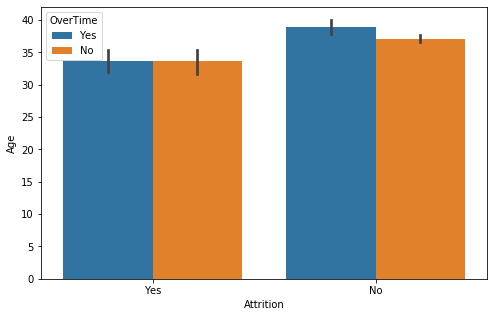

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(df['Attrition'],df['Age'],hue=df['OverTime'])

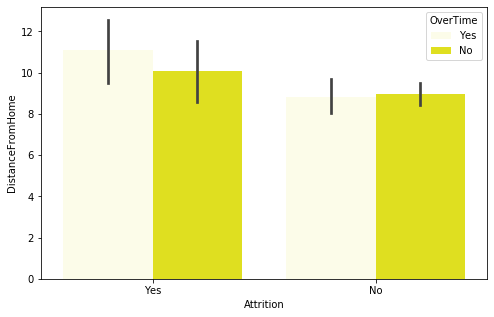

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(df['Attrition'],df['DistanceFromHome'],hue=df['OverTime'],color='yellow')

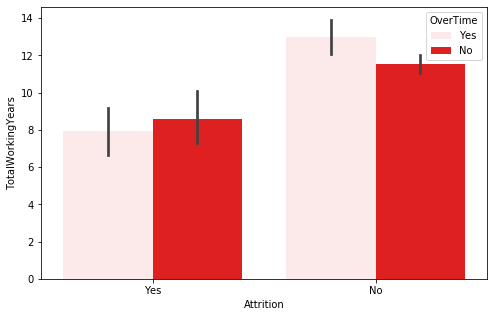

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(df['Attrition'],df['TotalWorkingYears'],hue=df['OverTime'],color='r')

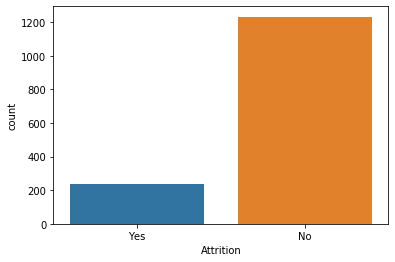

In [31]:
sns.countplot(df['Attrition'])
#Around 1200 (i.e 84%aprox) Employees are likely to leave the company out of 1470 employees

In [7]:
le = preprocessing.LabelEncoder()
for i in dataset:
    df[i]=le.fit_transform(df[i])
df.head(3)
#list(le.inverse_transform(df['Attrition']))
#print(le.classes_)

#func = lambda x:{j:i for i,j in enumerate(df[x].unique())}

#for i in dataset:
    #df[i] = df[i].apply(lambda x:func(i)[x]) #apply takes a function as a parameter and func(i)[x] is func(column_name)[key] gives me "value" of that key(as the first lambda func return a dict)
#(df['Department']).unique()
#func('Attrition')'''

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0


In [8]:
df.corr()['Attrition'].sort_values(ascending=False)
#factors affecting Attrition include Overtime,Marital Status, Distance From Home, Total Working Years, Job Level etc

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

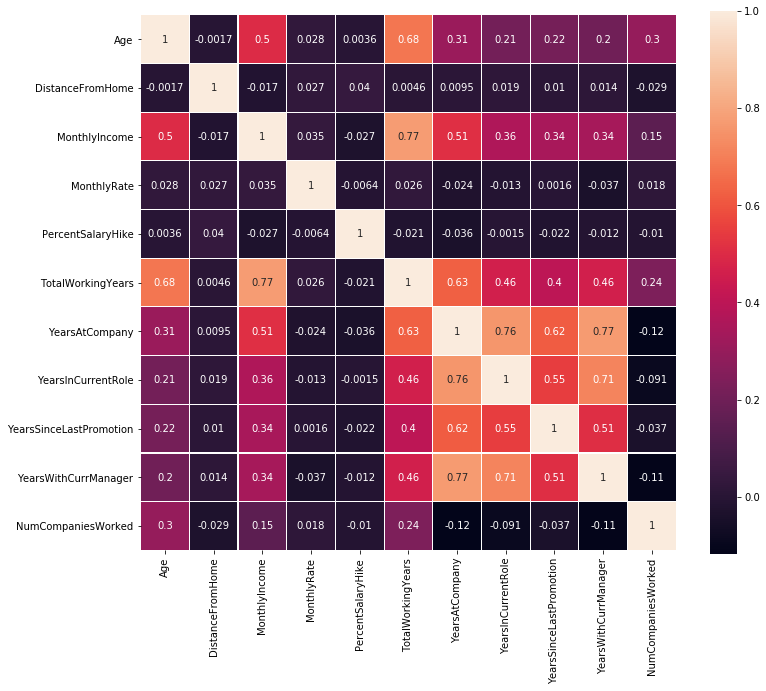

In [34]:
data_num=df[['Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]
plt.figure(figsize=(12,10))
sns.heatmap(data_num.corr(), annot = True, square = True, linewidths = 0.1 )

# Logistic Regression

### Unbalanced Data

In [9]:
x = df.drop('Attrition',axis=1) #training the model for unbalanced data
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=574)
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_predicted = regressor.predict(x_test)
metrics.accuracy_score(y_test,y_predicted)

0.8673469387755102

In [11]:
metrics.confusion_matrix(y_test,y_predicted)

array([[255,   0],
       [ 39,   0]], dtype=int64)

In [12]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



### Dataset is highly imbalanced as Employee leaving is only 16% whereas not leaving is 84%

In [13]:
df['Attrition'].value_counts()/1470

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

### Balanced Data

In [14]:
from sklearn.utils import resample
X_train_u, y_train_u = resample(x_train[y_train == 1],
                               y_train[y_train == 1],
                               replace = True, # sample with replacement
                               n_samples = x_train[y_train == 0].shape[0], # to match majority class
                               random_state = 1)
X_train_u = np.concatenate((x_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

In [15]:
x = df.drop('Attrition',axis=1) #training the model for balanced data
y = df['Attrition']
X_train_u, x_test, y_train_u, y_test = train_test_split(x,y,test_size=0.2,random_state=55)
regressor = LogisticRegression()
regressor.fit(X_train_u,y_train_u)

LogisticRegression()

In [16]:
y_predicted = regressor.predict(x_test)
metrics.accuracy_score(y_test,y_predicted)

0.8843537414965986

In [17]:
metrics.confusion_matrix(y_test,y_predicted)

array([[260,   0],
       [ 34,   0]], dtype=int64)

In [18]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       260
           1       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294



# K- Nearest Neighbours

### Unbalanced Data

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_y = y_train.ravel()
for K in range(20):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    predict_y = neigh.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,predict_y)*100,"% for K-Value:",K_value)
    
#Accuracy is highest at K-Value = 1 which is 95%

Accuracy is  95.23809523809523 % for K-Value: 1
Accuracy is  89.45578231292517 % for K-Value: 2
Accuracy is  89.1156462585034 % for K-Value: 3
Accuracy is  87.41496598639455 % for K-Value: 4
Accuracy is  86.05442176870748 % for K-Value: 5
Accuracy is  86.73469387755102 % for K-Value: 6
Accuracy is  86.39455782312925 % for K-Value: 7
Accuracy is  87.07482993197279 % for K-Value: 8
Accuracy is  85.37414965986395 % for K-Value: 9
Accuracy is  86.05442176870748 % for K-Value: 10
Accuracy is  86.05442176870748 % for K-Value: 11
Accuracy is  86.39455782312925 % for K-Value: 12
Accuracy is  86.05442176870748 % for K-Value: 13
Accuracy is  86.39455782312925 % for K-Value: 14
Accuracy is  86.39455782312925 % for K-Value: 15
Accuracy is  86.73469387755102 % for K-Value: 16
Accuracy is  86.73469387755102 % for K-Value: 17
Accuracy is  86.73469387755102 % for K-Value: 18
Accuracy is  86.73469387755102 % for K-Value: 19
Accuracy is  86.73469387755102 % for K-Value: 20


### Balanced Data

In [46]:
train_y = y_train.ravel() #for balanced data
for K in range(20):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train_u, y_train_u) 
    predict_y = neigh.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,predict_y)*100,"% for K-Value:",K_value)
    
#Accuracy is highest at K-Value = 16 which is 86.7%

Accuracy is  78.2312925170068 % for K-Value: 1
Accuracy is  84.6938775510204 % for K-Value: 2
Accuracy is  81.97278911564626 % for K-Value: 3
Accuracy is  85.37414965986395 % for K-Value: 4
Accuracy is  84.6938775510204 % for K-Value: 5
Accuracy is  86.05442176870748 % for K-Value: 6
Accuracy is  84.6938775510204 % for K-Value: 7
Accuracy is  84.6938775510204 % for K-Value: 8
Accuracy is  85.03401360544217 % for K-Value: 9
Accuracy is  85.37414965986395 % for K-Value: 10
Accuracy is  85.03401360544217 % for K-Value: 11
Accuracy is  85.71428571428571 % for K-Value: 12
Accuracy is  85.03401360544217 % for K-Value: 13
Accuracy is  86.39455782312925 % for K-Value: 14
Accuracy is  86.05442176870748 % for K-Value: 15
Accuracy is  86.73469387755102 % for K-Value: 16
Accuracy is  86.39455782312925 % for K-Value: 17
Accuracy is  86.73469387755102 % for K-Value: 18
Accuracy is  86.39455782312925 % for K-Value: 19
Accuracy is  86.73469387755102 % for K-Value: 20


# Factors leading to employees leaving the company: